## Reinforcement Learning

BSDS4 Deep Learning Elective
2022 DS Elective 4 <br>
University of Science and Technology of the Philippines <br>
Instructor: Romen Samuel Wabina, MSc <br>

In [1]:
win_loss_states = [0,6]

q_matrix = [[0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0],
            [0, 0]]

environment_matrix = [  [None, 0],
                        [-100, 0],
                        [0, 0],
                        [0, 0],
                        [0, 0],
                        [0, 100],
                        [0, 0],
                        [100, 0],
                        [0, 0],
                        [0, None]]

def getAllPossibleNextAction(cur_pos):
    step_matrix = [x != None for x in environment_matrix[cur_pos]]
    action = []
    if(step_matrix[0]):
        action.append(0) 
    if(step_matrix[1]):
        action.append(1)
    return(action)

def isGoalStateReached(cur_pos):
    return (cur_pos in [6])

def getNextState(cur_pos, action):
    if (action == 0):
        return cur_pos-1
    else:
        return cur_pos + 1

def isGameOver(cur_pos):
    return cur_pos in win_loss_states


In [2]:
import random
import numpy as np

discount = 0.9
learning_rate = 0.1
iterations = np.arange(100, 1000, 100)

for iteration in iterations:
    for _ in range(iteration):
        # get starting place
        cur_pos = random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
        
        # while goal state is not reached
        while(not isGameOver(cur_pos)):
            # get all possible next states from cur_step
            possible_actions = getAllPossibleNextAction(cur_pos)
            
            # select any one action randomly
            action = random.choice(possible_actions)
            
            # find the next state corresponding to the action selected
            next_state = getNextState(cur_pos, action)
            
            # update the q_matrix
            q_matrix[cur_pos][action] = q_matrix[cur_pos][action] + \
                                        learning_rate * (environment_matrix[cur_pos][action] + \
                                        discount * max(q_matrix[next_state]) -q_matrix[cur_pos][action])
            # go to next state
            cur_pos = next_state
            # print("Episode ", _ , " done")

    print("Training done!")
    print(np.round(q_matrix, 5))


Training done!
[[  0.        0.     ]
 [-96.90968  27.4983 ]
 [ 16.76654  47.02668]
 [ 37.30491  58.54903]
 [ 47.75402  71.35427]
 [ 50.56086  89.0581 ]
 [  0.        0.     ]
 [ 94.76652  56.83053]
 [ 79.37049  48.74142]
 [ 64.72681   0.     ]]
Training done!
[[  0.        0.     ]
 [-99.9871   64.57621]
 [ 57.39934  72.60751]
 [ 64.96431  80.84732]
 [ 72.53759  89.94011]
 [ 80.58658  99.98034]
 [  0.        0.     ]
 [ 99.98955  80.78217]
 [ 89.97085  72.73522]
 [ 80.93058   0.     ]]
Training done!
[[   0.         0.     ]
 [-100.        65.6088 ]
 [  59.04738   72.89971]
 [  65.60953   80.99986]
 [  72.89966   89.99995]
 [  80.9996    99.99997]
 [   0.         0.     ]
 [ 100.        80.9999 ]
 [  90.        72.89995]
 [  80.99999    0.     ]]
Training done!
[[   0.       0.   ]
 [-100.      65.61 ]
 [  59.049   72.9  ]
 [  65.61    81.   ]
 [  72.9     90.   ]
 [  81.     100.   ]
 [   0.       0.   ]
 [ 100.      81.   ]
 [  90.      72.9  ]
 [  81.       0.   ]]
Training done!
[

In [11]:
print(np.round(q_matrix, 5))

[[   0.       0.   ]
 [-100.      65.61 ]
 [  59.049   72.9  ]
 [  65.61    81.   ]
 [  72.9     90.   ]
 [  81.     100.   ]
 [   0.       0.   ]
 [ 100.      81.   ]
 [  90.      72.9  ]
 [  81.       0.   ]]


### AI with Assisted Q-Learning
A Simple Python Example and a Step Closer to AI with Assisted Q-Learning

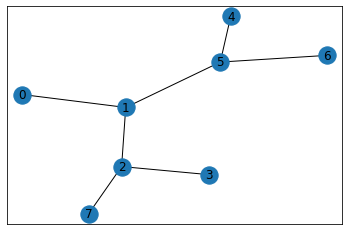

In [6]:
import networkx as nx
import numpy as np
import pylab as plt

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()


In [7]:
MATRIX_SIZE = 8
R  = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

for point in points_list:
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]= 0
R[goal,goal]= 100
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [8]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

gamma = 0.8
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
available_act = available_actions(initial_state)
available_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    # print('max_value', R[current_state, action] + gamma * max_value)
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
# update(initial_state, action, gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    # print ('Score:', str(score))

# print("Trained Q matrix:")
print(Q/np.max(Q)*100)


[[  0.          63.99950379   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19910683   0.          79.99937974   0.           0.
   51.19212347   0.           0.        ]
 [  0.          63.99950379   0.          63.99888353   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19960303   0.           0.        ]
 [  0.          63.99950379   0.           0.          40.95928546
    0.          40.95928546   0.        ]
 [  0.           0.           0.           0.           0.
   51.19910683   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99922468]]


In [9]:
# Testing
current_state = 0
steps = [current_state]
while current_state!= 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

Most efficient path:
[0, 1, 2, 7]


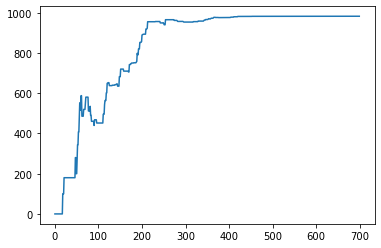

In [10]:
print("Most efficient path:")
print(steps)
plt.plot(scores)
plt.show()